In [1]:
from preprocessing import load_normalized_image, rgb_to_YCbCr, add_gaussian_noise, resize, rgb_to_gray
from results_tools import plot_simple_image
from im_tools import fast_noise_std_estimation
from coefficients_data_handler import get_surface_function
from p_laplacian_denoising_algorithms import p_laplacian_denoising

In [2]:
# Image parameters
img_index = 50

In [6]:
# Noise profile
std = 5
# Parameters for denoising
p = 1
dt = 1e-3
n_it = 50000
eps = 1e-6

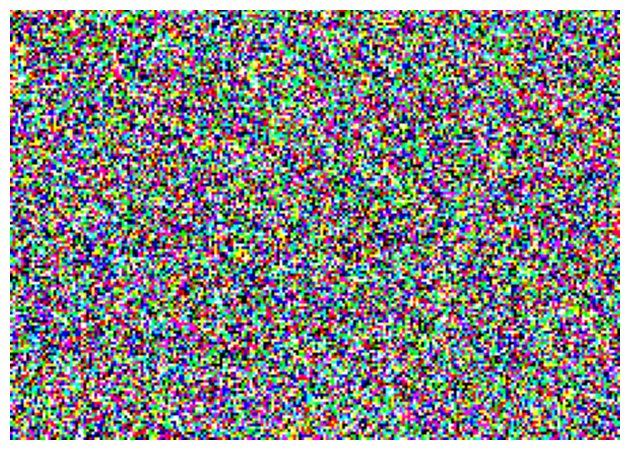

In [7]:
img = load_normalized_image(f'noise_test_images/img_{img_index}')
H, W, C = img.shape
img_noise = add_gaussian_noise(img, avg=0, std=std)
plot_simple_image(img_noise)

<AxesSubplot: title={'center': 'Noise std estimation per synthetic image'}>

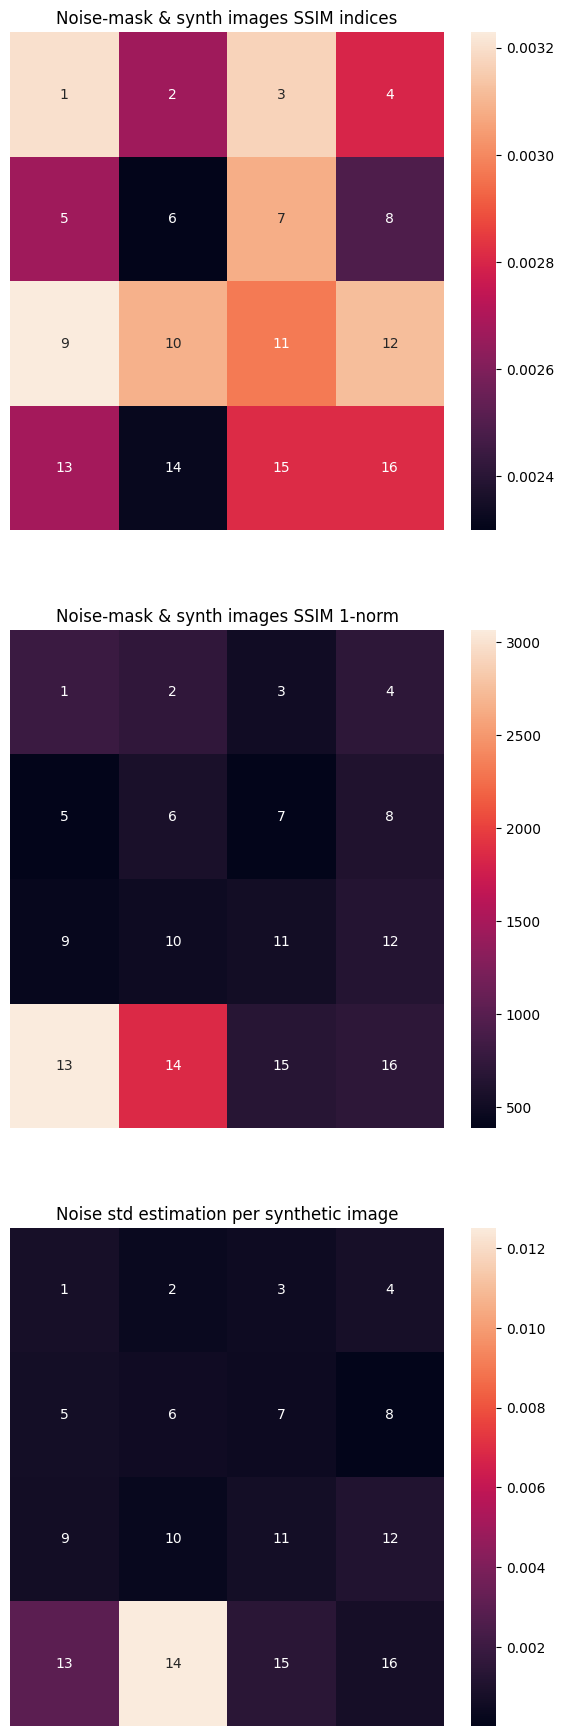

In [8]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import seaborn
import numpy as np

width_synth = W
height_synth = H

while width_synth % 64 != 0:
    width_synth += 1

while height_synth % 64 != 0:
    height_synth += 1

sums = np.zeros(shape=(4, 4))
indices = np.zeros(shape=(4, 4))
annotations = np.zeros(shape=(4, 4))
noise_std = np.zeros(shape=(4,4))
for i in range(4):
    for j in range(4):
        synth_index = 1 + 4 * i + j
        synth_img = resize(
            load_normalized_image(f'synth_images_testing/synth_img_{synth_index}/synth_img_{width_synth}_{height_synth}.png'), W,
            H)
        index, ssim_img = ssim(img_noise, synth_img, data_range=1.0, full=True, channel_axis=2)
        sums[i, j] = np.sum(np.abs(ssim_img))  # ssim image 1-norm
        indices[i,j] = index
        annotations[i, j] = synth_index
        noise_std[i,j] = fast_noise_std_estimation(synth_img)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(7,22))
ax1.set_title(f'Noise-mask & synth images SSIM indices')
seaborn.heatmap(indices, annot=annotations, xticklabels=False, yticklabels=False, ax=ax1)
ax2.set_title(f'Noise-mask & synth images SSIM 1-norm')
seaborn.heatmap(sums, annot=annotations, xticklabels=False, yticklabels=False, ax=ax2)
ax3.set_title(f'Noise std estimation per synthetic image')
seaborn.heatmap(noise_std, annot=annotations, xticklabels=False, yticklabels=False, ax=ax3)

----- SYNTH_INDEX: 1 - SSIM_INDEX: 0.0032028807357437562 -------


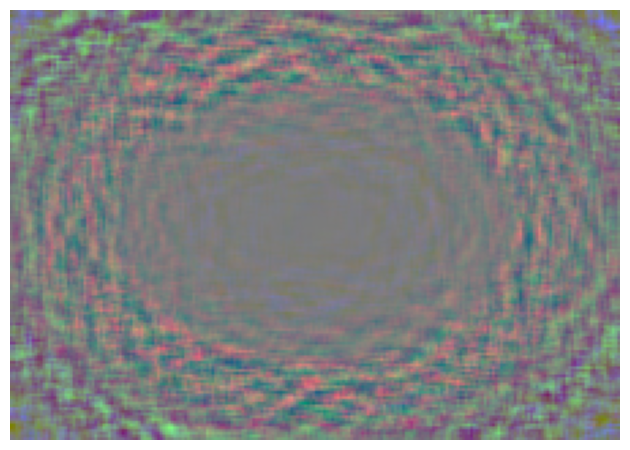

----- SYNTH_INDEX: 2 - SSIM_INDEX: 0.002669573541111369 -------


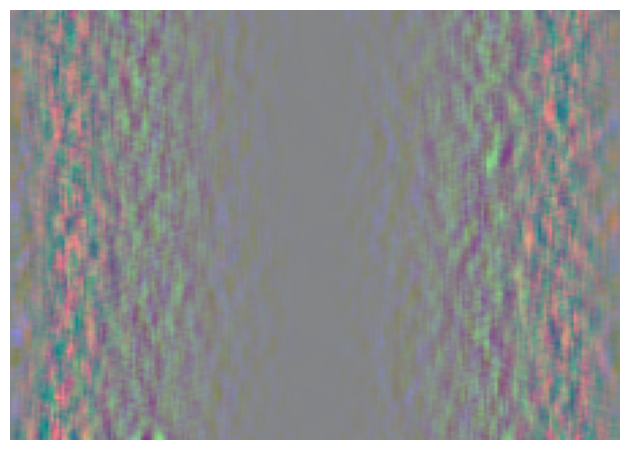

----- SYNTH_INDEX: 3 - SSIM_INDEX: 0.0031699257285186986 -------


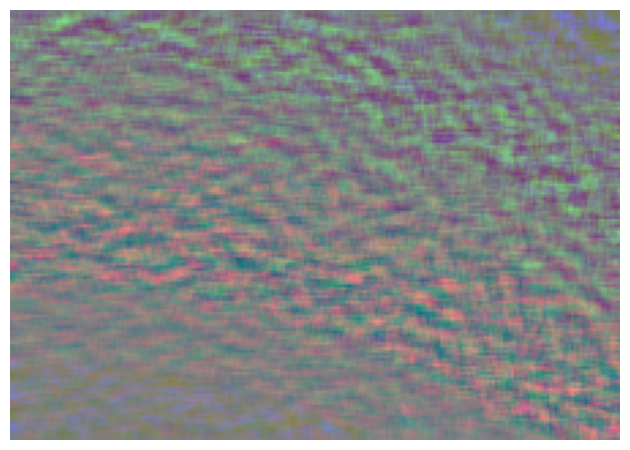

----- SYNTH_INDEX: 4 - SSIM_INDEX: 0.002797713969177034 -------


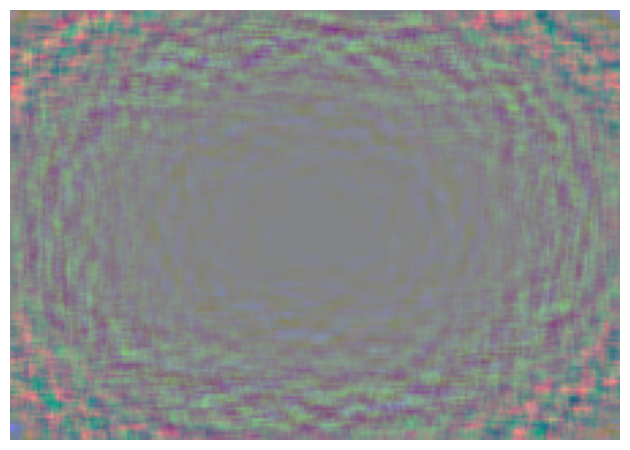

----- SYNTH_INDEX: 5 - SSIM_INDEX: 0.0026663248740328477 -------


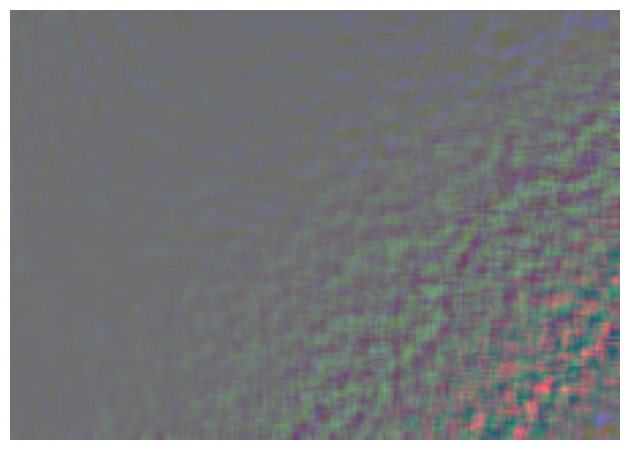

----- SYNTH_INDEX: 6 - SSIM_INDEX: 0.002299320799122692 -------


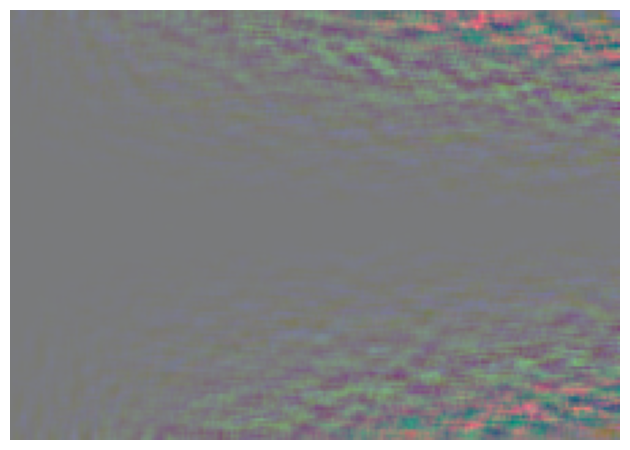

----- SYNTH_INDEX: 7 - SSIM_INDEX: 0.0030831585292897027 -------


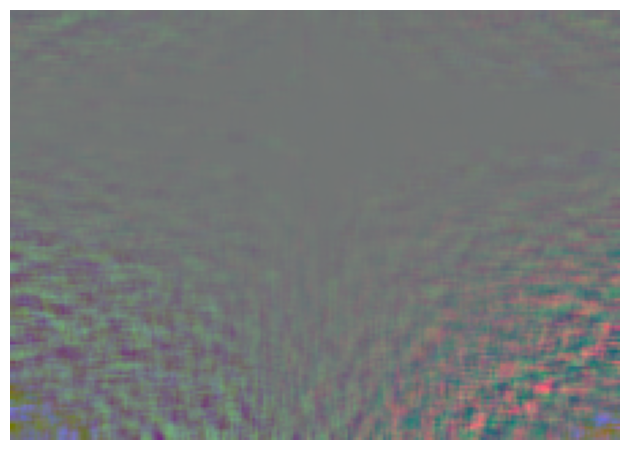

----- SYNTH_INDEX: 8 - SSIM_INDEX: 0.002490657021177087 -------


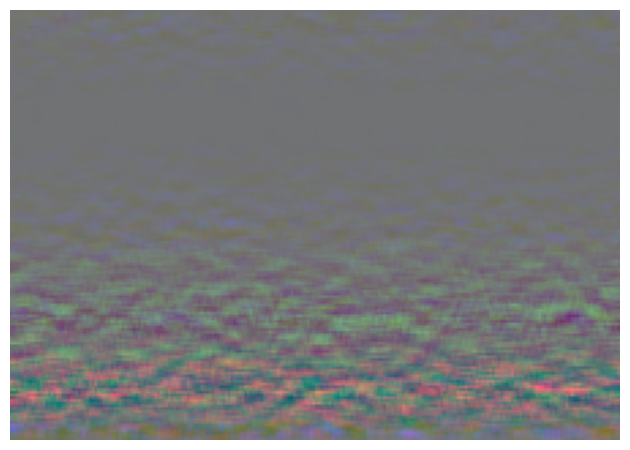

----- SYNTH_INDEX: 9 - SSIM_INDEX: 0.0032292146599299295 -------


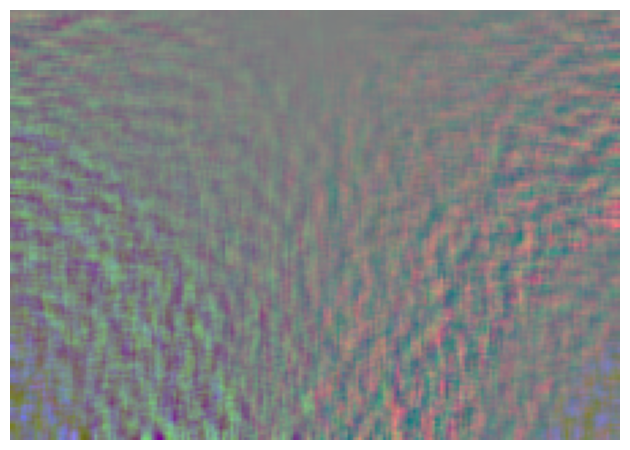

----- SYNTH_INDEX: 10 - SSIM_INDEX: 0.003088947451369404 -------


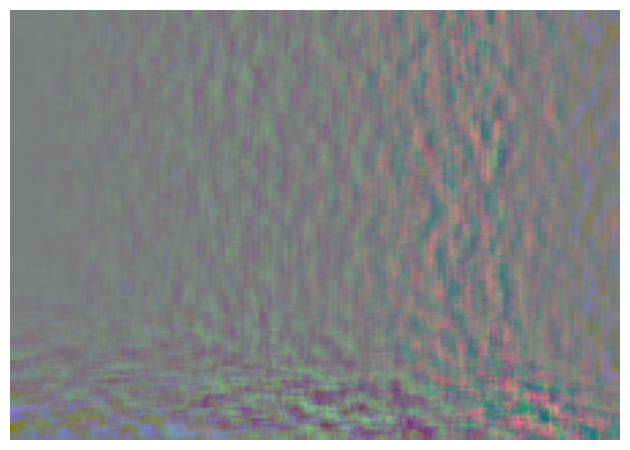

----- SYNTH_INDEX: 11 - SSIM_INDEX: 0.002970652930541426 -------


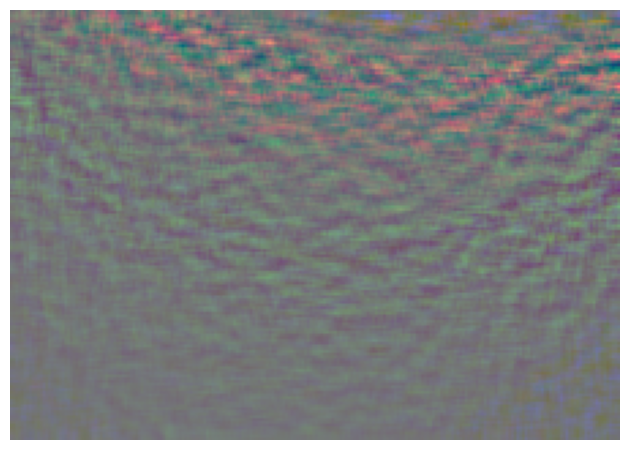

----- SYNTH_INDEX: 12 - SSIM_INDEX: 0.003119946940309056 -------


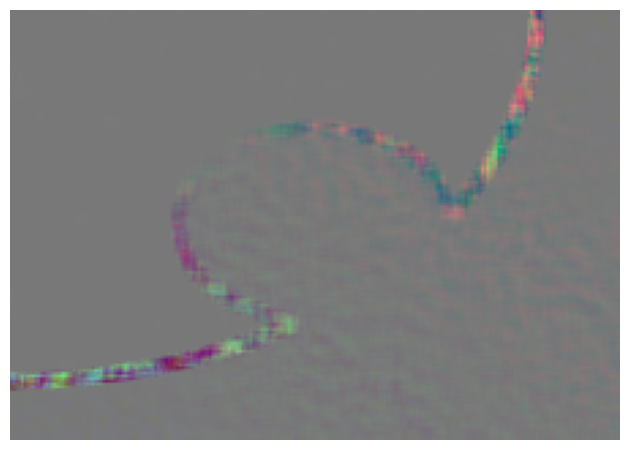

----- SYNTH_INDEX: 13 - SSIM_INDEX: 0.002680614350351881 -------


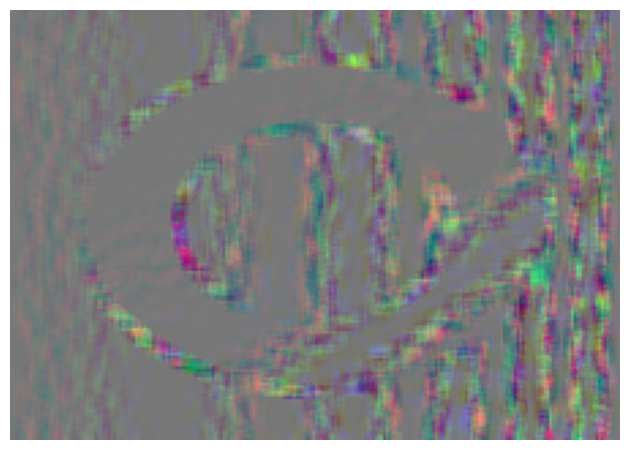

----- SYNTH_INDEX: 14 - SSIM_INDEX: 0.002319584491496291 -------


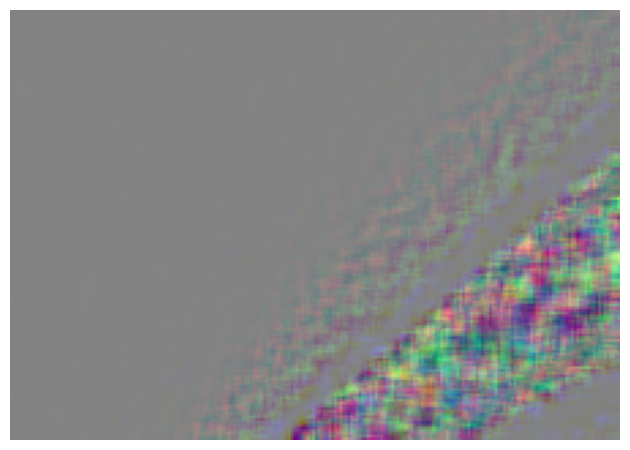

----- SYNTH_INDEX: 15 - SSIM_INDEX: 0.0028117339762901233 -------


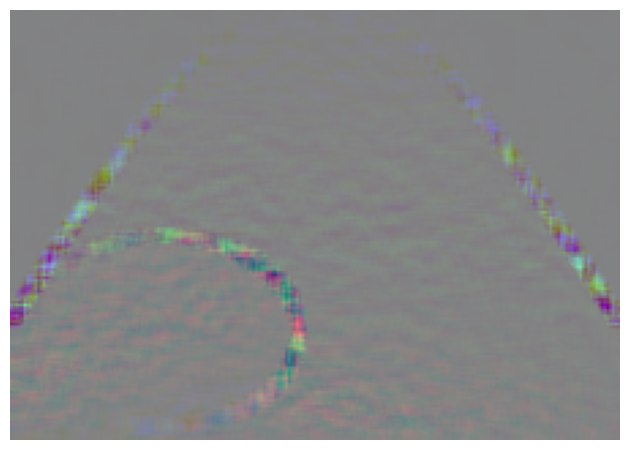

----- SYNTH_INDEX: 16 - SSIM_INDEX: 0.002812774066569348 -------


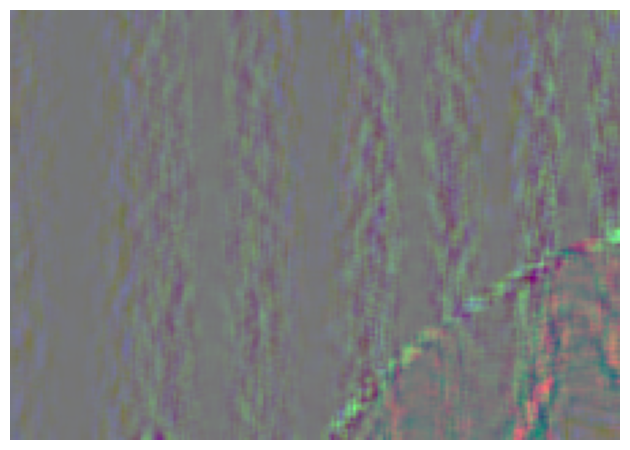

In [9]:
# Full loop
width_synth = W
height_synth = H

while width_synth % 64 != 0:
    width_synth += 1

while height_synth % 64 != 0:
    height_synth += 1

for synth_index in list(range(1,17)):
    synth_img = resize(load_normalized_image(f'synth_images_testing/synth_img_{synth_index}/synth_img_{width_synth}_{height_synth}.png'), W, H)
    index, ssim_img = ssim(img_noise, synth_img, data_range=1.0, full=True, channel_axis=2)
    ssim_img = (ssim_img - np.min(ssim_img)) / (np.max(ssim_img) - np.min(ssim_img))  # map pixels to [0,1]
    print(f'----- SYNTH_INDEX: {synth_index} - SSIM_INDEX: {index} -------')
    plot_simple_image(ssim_img)

# Demo: create synth img 17 by SSIM 1-norm maximization

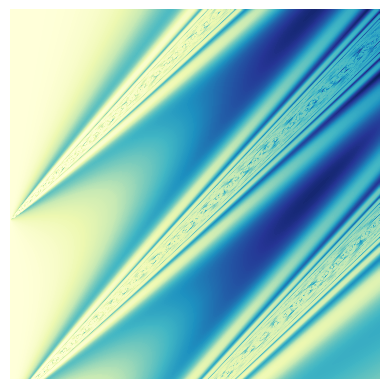

In [10]:
import numpy as np
import matplotlib.pyplot as plt


dimensions = [640]# + np.arange(10) * 64
index = 15

for x_limit in dimensions:
    for y_limit in dimensions:
        x = np.linspace(0, 1, x_limit)
        y = np.linspace(0, 1, y_limit)
        X, Y = np.meshgrid(x, y)
        Z = np.cos(np.tan(Y + X) * X) + np.cos(np.tan(Y+1 + X) * X) + np.cos(np.tan(Y+.5 + X) * X)
        plt.contourf(X, -Y, Z, levels=240, cmap="YlGnBu_r")
        plt.axis('off')
        plt.axis('scaled')
        # plt.imsave('my_synth_dummy.png', arr=Z, cmap=plt.cm.YlGnBu_r, format="png")
        plt.show()

SSIM 1-norm 2743.9153479977854
Noise std: 0.028640697446098987


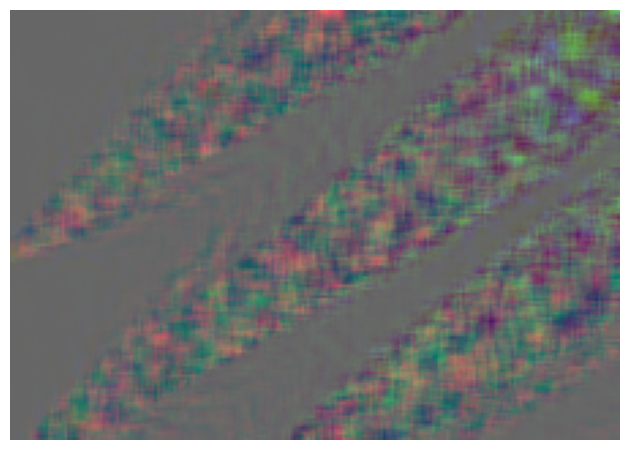

In [11]:
synth_img = resize(load_normalized_image('my_synth_dummy.png'), W, H)
index, ssim_img = ssim(img_noise, synth_img, data_range=1.0, full=True, channel_axis=2)
print(f'SSIM 1-norm {np.sum(np.abs(ssim_img))}')  # ssim image 1-norm (around synth 13)
print(f'Noise std: {fast_noise_std_estimation(synth_img)}')  # highest of all synthetic images
plot_simple_image((ssim_img - np.min(ssim_img)) / (np.max(ssim_img) - np.min(ssim_img)))

Habiendo procesado esta imagen sintética para $p=1$, ¿cómo son las gráficas?

![img](database_plots/database_plot_13.png)
![img](database_plots/database_plot_17.png)